# Time series Data in Pandas
- Converting to date time type

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

In [2]:
#pd.to_datetime('Jan:1:1970') # incorrect format

In [3]:
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

Timestamp('1970-01-01 00:00:00')

In [4]:
df = pd.read_csv('https://gist.githubusercontent.com/zgulde/c60209f379155744ced4dfc57068e55b/raw/97fc3ab1e2f6fff6ffd409d60029c53954d5784e/coffee_consumption.csv')

In [5]:
df.dtypes

date                   object
coffee_consumption    float64
dtype: object

In [6]:
df.shape

(261, 2)

In [7]:
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [8]:
# convert our date column to datetime type
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

# Working with date time series

In [9]:
#this pulls the year
df['year'] = df.date.dt.year

#this pulls the month
df['month'] = df.date.dt.month

#this pulls the day
df['day'] = df.date.dt.day

#this pulls the weekday
df['weekday'] = df.date.dt.day_name() # or .weekday_name for pandas < 1.0
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,2,Wednesday
2,2019-01-03,10.046015,2019,1,3,Thursday
3,2019-01-04,6.354805,2019,1,4,Friday
4,2019-01-07,8.545563,2019,1,7,Monday


In [10]:
# cleanup demonstration columns
del df['year']
del df['day']
del df['month']
del df['weekday']

In [11]:
df

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563
...,...,...
256,2019-12-25,12.250875
257,2019-12-26,7.513206
258,2019-12-27,9.464345
259,2019-12-30,14.623106


# Date Time Index

In [12]:
df = df.set_index('date').sort_index()
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
...,...
2019-12-25,12.250875
2019-12-26,7.513206
2019-12-27,9.464345


In [13]:
df.index.min(), df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [14]:
df['2019-05'] # pulls all data from may

,coffee_consumption
date,
2019-05-01,9.970773
2019-05-02,8.755956
2019-05-03,7.790948
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543


In [15]:
df['2019-05-06':'2019-05-16'] # NB. inclusive Pulls all data from specified dates

,coffee_consumption
date,
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543
2019-05-14,6.220478
2019-05-15,12.743796
2019-05-16,9.169615


# changing the period
- upsampling: larger time window == fewer data points... daily -> weekly 
- downsampling: smaller time window == more data points...daily -> hourly

In [16]:
by_day = df.asfreq('D')
by_day


,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,NaN
...,...
2019-12-27,9.464345
2019-12-28,NaN
2019-12-29,NaN


# filling missing values

In [17]:
by_day.coffee_consumption

date
2019-01-01    14.301915
2019-01-02    12.905900
2019-01-03    10.046015
2019-01-04     6.354805
2019-01-05          NaN
                ...    
2019-12-27     9.464345
2019-12-28          NaN
2019-12-29          NaN
2019-12-30    14.623106
2019-12-31    10.168315
Freq: D, Name: coffee_consumption, Length: 365, dtype: float64

In [18]:
by_day.assign(
    ffill=lambda df: df.coffee_consumption.ffill(),
    bfill=lambda df: df.coffee_consumption.bfill()
).head(15)

,coffee_consumption,ffill,bfill
date,,,
2019-01-01,14.301915,14.301915,14.301915
2019-01-02,12.905900,12.905900,12.905900
2019-01-03,10.046015,10.046015,10.046015
2019-01-04,6.354805,6.354805,6.354805
2019-01-05,NaN,6.354805,8.545563
2019-01-06,NaN,6.354805,8.545563
2019-01-07,8.545563,8.545563,8.545563
2019-01-08,9.410101,9.410101,9.410101
2019-01-09,7.219271,7.219271,7.219271


In [19]:
df = df.fillna(0)

# Resampling


In [20]:
df.resample('3W').mean() # Every 3 weeks

,coffee_consumption
date,
2019-01-06,10.902159
2019-01-27,9.744190
2019-02-17,10.855301
2019-03-10,9.413472
2019-03-31,11.062768
2019-04-21,10.222518
2019-05-12,10.092044
2019-06-02,11.052819
2019-06-23,9.592148


In [21]:
df.resample('M').sum()

,coffee_consumption
date,
2019-01-31,233.926749
2019-02-28,206.038853
2019-03-31,219.779000
2019-04-30,222.030626
2019-05-31,248.480093
2019-06-30,183.656493
2019-07-31,248.267463
2019-08-31,224.007066
2019-09-30,215.689004


In [22]:
# How can we get a month by mnth avaerage of total weekly coffee consumption?

df.resample('W').sum().resample('M').mean()

,coffee_consumption
date,
2019-01-31,47.442870
2019-02-28,52.967916
2019-03-31,51.620292
2019-04-30,50.566915
2019-05-31,52.163714
2019-06-30,48.648939
2019-07-31,52.279082
2019-08-31,53.288159
2019-09-30,50.882459


In [23]:
df.resample('Q').sum()

,coffee_consumption
date,
2019-03-31,659.744602
2019-06-30,654.167213
2019-09-30,687.963534
2019-12-31,690.659860


# Plotting

<Figure size 936x504 with 0 Axes>

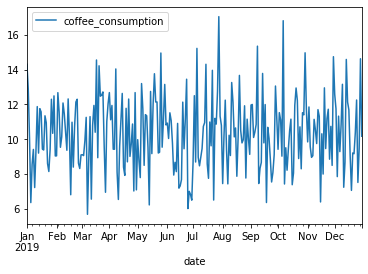

In [24]:
plt.figure(figsize=(13,7))
df.plot()

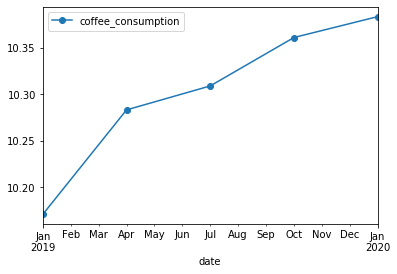

In [25]:
df.resample('3M').mean().plot(marker='o')

# Rolling Windows

,coffee_consumption,rolling_3,rolling_5,rolling_7
date,,,,
2019-01-06,10.902159,NaN,NaN,NaN
2019-01-13,9.277212,NaN,NaN,NaN
2019-01-20,10.265097,10.148156,NaN,NaN
2019-01-27,9.690260,9.744190,NaN,NaN
2019-02-03,10.639508,10.198289,10.154847,NaN
2019-02-10,11.195485,10.508418,10.213512,NaN
2019-02-17,10.730911,10.855301,10.504252,10.385805
2019-02-24,9.808429,10.578275,10.412919,10.229557
2019-03-03,9.486304,10.008548,10.372127,10.259428


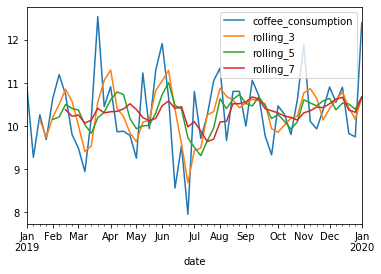

In [26]:
rolling_df = df.resample('W').mean().assign(
    rolling_3=lambda df: df.coffee_consumption.rolling(3).mean(),
    rolling_5=lambda df: df.coffee_consumption.rolling(5).mean(),
    rolling_7=lambda df: df.coffee_consumption.rolling(7).mean(),
)
rolling_df.plot()
rolling_df.head(20)

In [27]:
df.resample('W').mean().rolling(4).sum()

,coffee_consumption
date,
2019-01-06,NaN
2019-01-13,NaN
2019-01-20,NaN
2019-01-27,40.134728
2019-02-03,39.872077
2019-02-10,41.790351
2019-02-17,42.256164
2019-02-24,42.374333
2019-03-03,41.221128


# Lagging and Leading
- shift: moves data points forwards or backwards
- diff: takes the difference buwteen future or past data points

In [28]:
df['shift(-1)'] = df.coffee_consumption.shift(-1)
df['shift(1)'] = df.coffee_consumption.shift(1)
df['shift(3)'] = df.coffee_consumption.shift(3)
df['diff(1)'] = df.coffee_consumption.diff(1)
df['diff(3)'] = df.coffee_consumption.diff(3)
df.head(25)

,coffee_consumption,shift(-1),shift(1),shift(3),diff(1),diff(3)
date,,,,,,
2019-01-01,14.301915,12.905900,NaN,NaN,NaN,NaN
2019-01-02,12.905900,10.046015,14.301915,NaN,-1.396015,NaN
2019-01-03,10.046015,6.354805,12.905900,NaN,-2.859885,NaN
2019-01-04,6.354805,8.545563,10.046015,14.301915,-3.691210,-7.947110
2019-01-07,8.545563,9.410101,6.354805,12.905900,2.190757,-4.360337
2019-01-08,9.410101,7.219271,8.545563,10.046015,0.864539,-0.635914
2019-01-09,7.219271,9.338456,9.410101,6.354805,-2.190831,0.864465
2019-01-10,9.338456,11.872667,7.219271,8.545563,2.119186,0.792894
2019-01-11,11.872667,9.198816,9.338456,9.410101,2.534210,2.462566


In [29]:
# cleanup the additional columns
for col in ['shift(-1)', 'shift(1)', 'shift(3)', 'diff(1)', 'diff(3)']:
    del df[col]

# StrfTime

In [30]:
df.index.strftime('%B %d, %Y')[:4]

Index(['January 01, 2019', 'January 02, 2019', 'January 03, 2019',
       'January 04, 2019'],
      dtype='object', name='date')

In [31]:
df.index.strftime('%B the %d of %Y')[:4]

Index(['January the 01 of 2019', 'January the 02 of 2019',
       'January the 03 of 2019', 'January the 04 of 2019'],
      dtype='object', name='date')

# Time Deltas

In [32]:
start_date = pd.to_datetime('20190204')
graduation_date = pd.to_datetime('20190614')

days_between = graduation_date - start_date
days_between


Timedelta('130 days 00:00:00')

In [33]:
days_between // pd.Timedelta('1d')

130

In [34]:
df['days_since_max'] = (df.index.max() - df.index) // pd.Timedelta('1d')
df.tail(10)

,coffee_consumption,days_since_max
date,,
2019-12-18,9.058819,13
2019-12-19,7.056316,12
2019-12-20,9.208448,11
2019-12-23,9.162464,8
2019-12-24,10.372400,7
2019-12-25,12.250875,6
2019-12-26,7.513206,5
2019-12-27,9.464345,4
2019-12-30,14.623106,1


# Exercises

In [35]:
from vega_datasets import data
df = data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [36]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [37]:
# Any nulls?

df.isna().sum()

temp    0
date    0
dtype: int64

In [38]:
# How bout setting the index

df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [39]:
df_mean = df.resample('D').mean()
df_mean

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


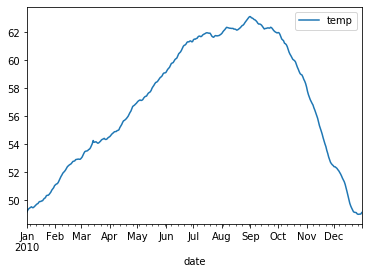

In [40]:
df_mean.plot()

### 2. Write the code necessary to visualize the minimum temperature over time.

In [41]:
df_min = df.resample('D').min()
df_min

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


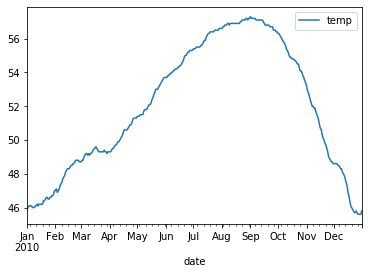

In [42]:
df_min.plot()

### 3. Write the code necessary to visualize the maximum temperature over time

In [43]:
df_max = df.resample('D').max()
df_max

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8
...,...
2010-12-27,53.2
2010-12-28,53.2
2010-12-29,53.2


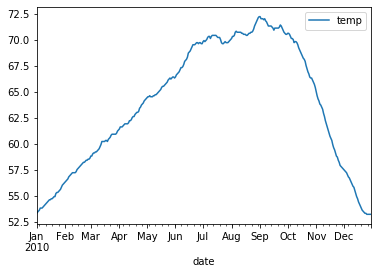

In [44]:
df_max.plot()

### 4. Which month is the coldest, on average?

In [45]:
print(df.resample('M').mean().min())

df.resample('M').mean().idxmin()


# Answer would be January

temp    49.98414
dtype: float64


temp   2010-01-31
dtype: datetime64[ns]

### 5. Which month has the highest average temperature?

In [46]:
print(df.resample('M').mean().max())

df.resample('M').mean().idxmax()

temp    62.487083
dtype: float64


temp   2010-09-30
dtype: datetime64[ns]

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [47]:
diff_day = df.resample('D').agg(['min','max'])

diff_day

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [48]:
diff_day['difference'] = diff_day['temp']['max'] - diff_day['temp']['min']
diff_day

print(diff_day.difference.max())
diff_day.difference.idxmax()

15.0


Timestamp('2010-08-31 00:00:00', freq='D')

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [49]:
bdf = df.resample('D').agg(['min','max','mean'])

bdf

temp                 
             min   max       mean
date                             
2010-01-01  45.8  53.3  49.170833
2010-01-02  46.0  53.4  49.304167
2010-01-03  46.1  53.5  49.391667
2010-01-04  46.1  53.6  49.445833
2010-01-05  46.1  53.8  49.491667
...          ...   ...        ...
2010-12-27  45.6  53.2  48.991667
2010-12-28  45.6  53.2  49.000000
2010-12-29  45.6  53.2  49.012500
2010-12-30  45.6  53.2  49.012500
2010-12-31  45.8  53.2  49.116667

[365 rows x 3 columns]

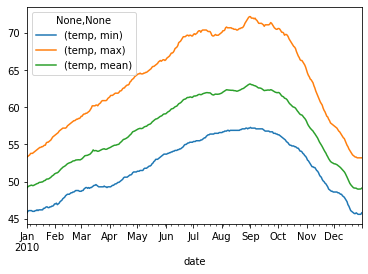

In [50]:
bdf.plot()

# 2nd Set

In [51]:
from vega_datasets import data
df1 = data.seattle_weather()
df1

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [52]:
df1.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

### 1. Which year and month combination has the highest amount of precipitation?


In [53]:
df1 = df1.set_index('date').sort_index()
df1

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [54]:
print(df1.precipitation.resample('M').sum().max())

df1.precipitation.resample('M').sum().idxmax()

284.5000000000001


Timestamp('2015-12-31 00:00:00', freq='M')

### 2. Visualize the amount of monthly precipitation over time.

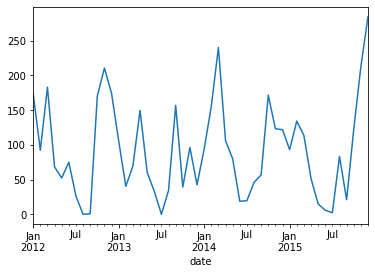

In [55]:
month_precip = df1.precipitation.resample('M').sum()
month_precip.plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

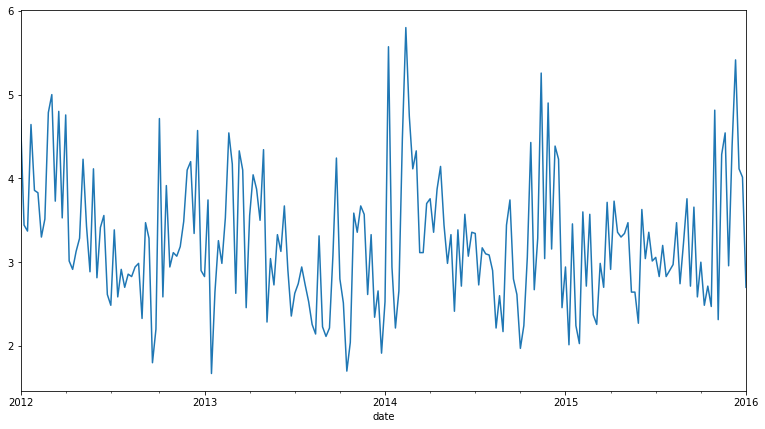

In [56]:
plt.figure(figsize=(13,7))
wind = df1.wind.resample('W').mean()
wind.plot()

### 4. Which year-month combination is the windiest?

In [57]:
print(df1.wind.resample('M').mean().max())

df1.wind.resample('M').mean().idxmax()

4.5285714285714285


Timestamp('2014-02-28 00:00:00', freq='M')

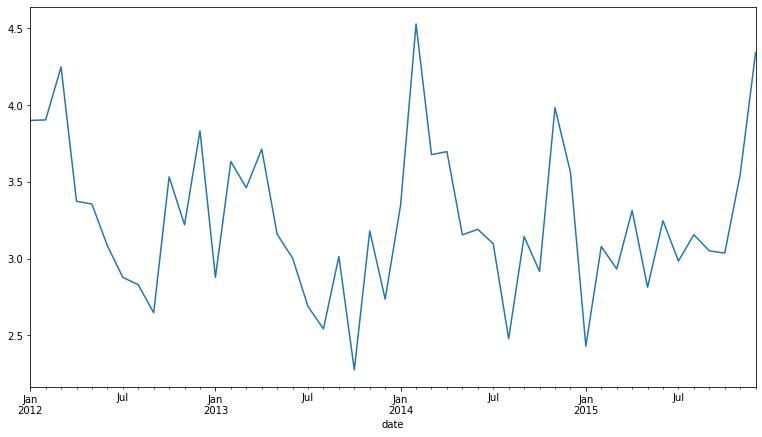

In [58]:
plt.figure(figsize=(13,7))
wind = df1.wind.resample('M').mean()
wind.plot()

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [59]:
sun = df1[df1.weather == 'sun'].resample('Y').count().weather
print(sun.max())
sun.idxmax()
#sun

211


Timestamp('2014-12-31 00:00:00', freq='A-DEC')

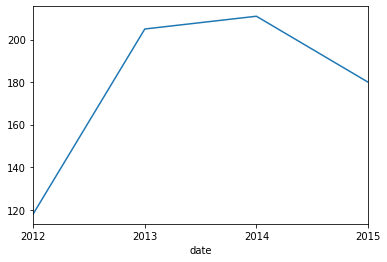

In [60]:
sun.plot()

In [61]:
sun

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

### 6. In which month does it rain the most?

In [62]:
from vega_datasets import data
df1 = data.seattle_weather()

df1 = data.seattle_weather().set_index('date')
####
avg_precip = df1.precipitation.resample('M').sum()

print(avg_precip.max())
avg_precip.idxmax()

284.5000000000001


Timestamp('2015-12-31 00:00:00', freq='M')

In [63]:
### alternate code
### bringing in a fresh df

from vega_datasets import data
df1 = data.seattle_weather()

df1 = data.seattle_weather().set_index('date')

df1['month'] = df1.index.month
df1.head()


,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
2012-01-02,10.9,10.6,2.8,4.5,rain,1
2012-01-03,0.8,11.7,7.2,2.3,rain,1
2012-01-04,20.3,12.2,5.6,4.7,rain,1
2012-01-05,1.3,8.9,2.8,6.1,rain,1


In [92]:
precip = df1.groupby('month').precipitation.sum()

print(precip)
print(precip.idxmax())
precip.max()

month
1     466.0
2     422.0
3     606.2
4     375.4
5     207.5
6     132.9
7      48.2
8     163.7
9     235.5
10    503.4
11    642.5
12    622.7
Name: precipitation, dtype: float64
11


642.5000000000002

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [65]:
df1.head()

,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
2012-01-02,10.9,10.6,2.8,4.5,rain,1
2012-01-03,0.8,11.7,7.2,2.3,rain,1
2012-01-04,20.3,12.2,5.6,4.7,rain,1
2012-01-05,1.3,8.9,2.8,6.1,rain,1


In [66]:
mr = df1['precipitation'] != 0
month_rain = df1[mr]
mthly_rain = month_rain.resample('M')['weather'].count()

print(mthly_rain.max())
mthly_rain.idxmax()

27


Timestamp('2012-12-31 00:00:00', freq='M')

# Flights

In [67]:
df2 = data.flights_20k()
df2 = df2.set_index('date').sort_index()
df2

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,-5,318,FLL,JAX
2001-03-31 21:05:00,-1,451,MCI,IND


### 1. Convert any negative delays to 0.

In [68]:
""" .clip - Given an interval, values outside the interval are clipped to the 
interval edges. For example, if an interval of [0, 1] is specified, 
values smaller than 0 become 0, and values larger than 1 become 1. """

df2['delay'] = df2['delay'].clip(0)

In [69]:
df2

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,318,FLL,JAX
2001-03-31 21:05:00,0,451,MCI,IND


### 2.Which hour of the day has the highest average delay?

In [70]:
hr_delay = df2.resample('H')['delay'].mean()

print(hr_delay.max())
hr_delay.idxmax()

360.0


Timestamp('2001-02-23 03:00:00', freq='H')

In [71]:
hr_delay

date
2001-01-01 00:00:00    14.000000
2001-01-01 01:00:00          NaN
2001-01-01 02:00:00          NaN
2001-01-01 03:00:00          NaN
2001-01-01 04:00:00          NaN
                         ...    
2001-03-31 17:00:00    11.666667
2001-03-31 18:00:00    12.538462
2001-03-31 19:00:00    22.125000
2001-03-31 20:00:00    27.600000
2001-03-31 21:00:00    11.200000
Freq: H, Name: delay, Length: 2158, dtype: float64

In [72]:
#df['hour'] = 
df2.groupby(df2.index.hour).delay.mean()

date
0     127.916667
1     170.000000
3     302.500000
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay, dtype: float64

### 3. Does the day of the week make a difference in the delay amount?

In [73]:
# Had to bring in a fresh df

df2 = data.flights_20k()
df2['day'] = df2['date'].dt.day_name()

# Now we can set the index and sort it
df2 = df2.set_index('date').sort_index()

In [74]:
day_delay = df2.groupby('day')['delay'].mean()
print(day_delay.max())
day_delay.idxmax()

15.59445178335535


'Friday'

### 4. Does the month make a difference in the delay amount?

In [75]:
# bring in a fresh df again, didnt think that was necessary... 
# only have 3 months of data

df2 = data.flights_20k()
df2 = df2.set_index('date').sort_index()

mth_delay = df2.resample('M')['delay'].mean()
mth_delay

date
2001-01-31    8.242630
2001-02-28    9.398338
2001-03-31    6.804310
Freq: M, Name: delay, dtype: float64

In [76]:
print(mth_delay.max())
mth_delay.idxmax()

9.398337595907929


Timestamp('2001-02-28 00:00:00', freq='M')

# Bonus (more)

In [77]:
from vega_datasets import data
df3 = data.iowa_electricity()
df3.shape

(51, 3)

### 1. For each row, calculate the percentage of the year's total that energy source provided

In [78]:
df3 = df3.set_index('year').sort_index()
df3

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574
2002-01-01,Renewables,1963
2003-01-01,Fossil Fuels,36234
2003-01-01,Nuclear Energy,3988
2003-01-01,Renewables,1885


In [79]:
df3.source.value_counts()

Renewables        17
Fossil Fuels      17
Nuclear Energy    17
Name: source, dtype: int64

# Use the sf_temps dataset

### 2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [80]:
from vega_datasets import data
df4 = data.sf_temps()
df4

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [81]:
#df4 = df4.set_index('date').sort_index()

In [82]:
#df4 = df4.resample('D').mean()

In [83]:
df4['temp_range'] = pd.cut(df4.temp, bins=[0,45,60,80,100], labels=['cold','cool','warm','hot'])
df4

,temp,date,temp_range
0,47.8,2010-01-01 00:00:00,cool
1,47.4,2010-01-01 01:00:00,cool
2,46.9,2010-01-01 02:00:00,cool
3,46.5,2010-01-01 03:00:00,cool
4,46.0,2010-01-01 04:00:00,cool
...,...,...,...
8754,50.4,2010-12-31 19:00:00,cool
8755,49.9,2010-12-31 20:00:00,cool
8756,49.4,2010-12-31 21:00:00,cool
8757,48.8,2010-12-31 22:00:00,cool


In [84]:
# gonna have to redo bins

df4.temp_range.value_counts()

cool    6375
warm    2384
hot        0
cold       0
Name: temp_range, dtype: int64

In [85]:
df4.temp.max(), df4.temp.min()


(72.2, 45.6)

In [86]:
df4['temp_range'] = pd.cut(df4.temp, bins=[0,49,59,69,100], labels=['cold','cool','warm','hot'])
df4

,temp,date,temp_range
0,47.8,2010-01-01 00:00:00,cold
1,47.4,2010-01-01 01:00:00,cold
2,46.9,2010-01-01 02:00:00,cold
3,46.5,2010-01-01 03:00:00,cold
4,46.0,2010-01-01 04:00:00,cold
...,...,...,...
8754,50.4,2010-12-31 19:00:00,cool
8755,49.9,2010-12-31 20:00:00,cool
8756,49.4,2010-12-31 21:00:00,cool
8757,48.8,2010-12-31 22:00:00,cold


In [87]:
# binning thats a bit better

df4.temp_range.value_counts()

cool    5214
warm    2390
cold     755
hot      400
Name: temp_range, dtype: int64

### 3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

In [88]:
df4 = df4.set_index('date').sort_index()

mth_mth = df4.groupby('temp_range')['temp'].count()

In [89]:
mth_mth

temp_range
cold     755
cool    5214
warm    2390
hot      400
Name: temp, dtype: int64

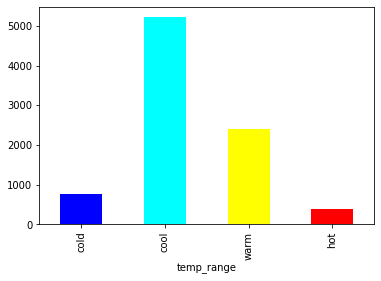

In [90]:
mth_mth.plot.bar(color = ['blue','cyan','yellow','red'])

### 4. Create pretty labels for time plots